In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()['color']

df = pd.read_csv('coin_data.csv', delimiter = ',')

df.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,tezos,"Dec 04, 2019",1.29,1.32,1.25,1.25,"46,048,752","824,588,509"
1,tezos,"Dec 03, 2019",1.24,1.32,1.21,1.29,"41,462,224","853,213,342"
2,tezos,"Dec 02, 2019",1.25,1.26,1.20,1.24,"27,574,097","817,872,179"
3,tezos,"Dec 01, 2019",1.33,1.34,1.25,1.25,"24,127,567","828,296,390"
4,tezos,"Nov 30, 2019",1.31,1.37,1.31,1.33,"28,706,667","879,181,680"


In [2]:
# We need to remove commas from out data, in order to convert them to right data types

df['Market Cap'] = df['Market Cap'].str.replace(',','')
df['Volume'] = df['Volume'].str.replace(',','')
df['Open'] = df['Open'].str.replace(',','')
df['High'] = df['High'].str.replace(',','')
df['Low'] = df['Low'].str.replace(',','')
df['Close'] = df['Close'].str.replace(',','')


# It will be useful to remove spaces from all collumn names

df = df.rename(columns = {'Market Cap':'Market_Cap'})


In [3]:
# Converting data types

df['Date'] = pd.to_datetime(df['Date'])
df['Volume'] = pd.to_numeric(df['Volume'])
df['Market_Cap'] = pd.to_numeric(df['Market_Cap'])
df['Open'] = pd.to_numeric(df['Open'])
df['High'] = pd.to_numeric(df['High'])
df['Low'] = pd.to_numeric(df['Low'])
df['Close'] = pd.to_numeric(df['Close'])


<Figure size 1500x1000 with 0 Axes>

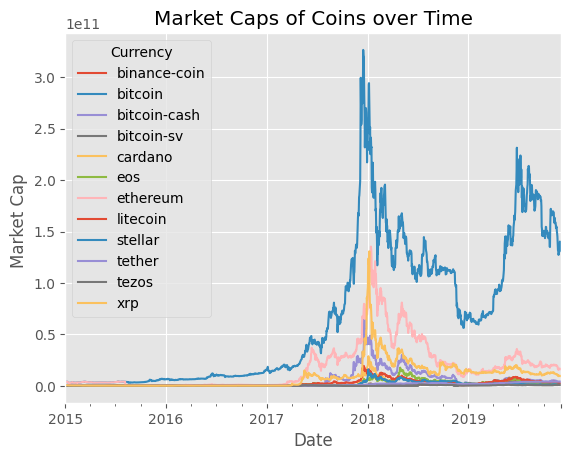

<Figure size 1500x1000 with 0 Axes>

In [4]:
# Finding out the biggest Market Caps in the market

df = df[df['Date'].dt.year >= 2015]

df_market = df.pivot_table(index='Date', columns='Currency', values='Market_Cap')

df_market.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Market Cap ')
plt.title('Market Caps of Coins over Time')
plt.figure(figsize=(15, 10))

# we see that the biggest Market Cap is bitcoin and it reaches its peak in 2018



In [87]:
# I repivoted the table so it will be more comfortable to work with the data

df = df[df['Date'].dt.year >= 2015]

df_pivot = df.pivot_table(index='Date', columns='Currency', values='Close')

df_pivot


Currency,binance-coin,bitcoin,bitcoin-cash,bitcoin-sv,cardano,eos,ethereum,litecoin,stellar,tether,tezos,xrp
Date,,,,,,,,,,,,
2015-01-01,2.70,314.25,0.024390,2.70,0.005493,2.70,314.25,2.70,0.005493,0.024390,0.005493,0.024390
2015-01-02,2.67,315.03,0.024318,2.67,0.005481,2.67,315.03,2.67,0.005481,0.024318,0.005481,0.024318
2015-01-03,2.13,281.08,0.022106,2.13,0.004672,2.13,281.08,2.13,0.004672,0.022106,0.004672,0.022106
2015-01-04,1.96,264.20,0.018928,1.96,0.004416,1.96,264.20,1.96,0.004416,0.018928,0.004416,0.018928
2015-01-05,2.08,274.47,0.020316,2.08,0.004947,2.08,274.47,2.08,0.004947,0.020316,0.004947,0.020316
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-30,15.72,7569.63,218.910000,107.68,0.040425,2.76,152.54,47.48,0.059641,1.000000,1.330000,0.226474
2019-12-01,15.50,7424.29,216.170000,104.29,0.039587,2.78,151.19,47.71,0.058082,1.000000,1.250000,0.225333
2019-12-02,15.19,7321.99,215.660000,100.52,0.038056,2.69,149.06,45.82,0.056078,1.000000,1.240000,0.219581


<Figure size 1500x1000 with 0 Axes>

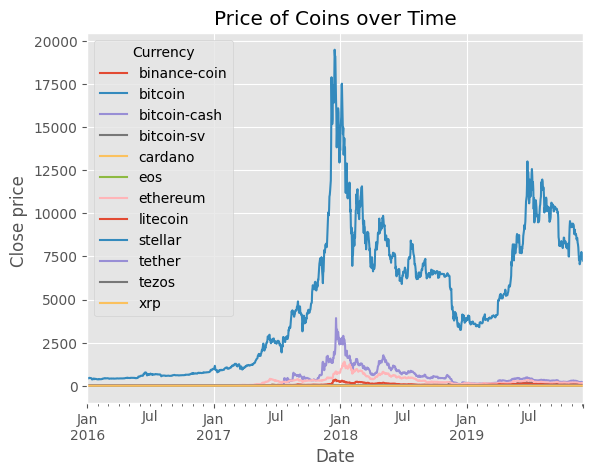

<Figure size 1500x1000 with 0 Axes>

In [40]:
# Q1 : What are the general trends in cryptocurrency prices over time? 
#     Can you identify any patterns, cycles, or recurring trends in the data?


df_pivot.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Close price ')
plt.title('Price of Coins over Time')
plt.figure(figsize=(15, 10))

# As we can see regarding this plot, peak of prices was reached in 2018 was declining until 2019. Moreover, we can see that prices of coins are correlated between each other.

In [41]:
# Q2 :What is the correlation between bitcoin and alt coin prices?
#    

correlation = df_pivot.corr()

correlation

# AS we see there is very strong correlation between prices of Bitcoin and Bitcoin-cash and litecoin. Pretty decent correlation with ethereum, cardono

Currency,binance-coin,bitcoin,bitcoin-cash,bitcoin-sv,cardano,eos,ethereum,litecoin,stellar,tether,tezos,xrp
Currency,,,,,,,,,,,,
binance-coin,1.000000,0.465125,0.084507,0.697460,0.183775,0.586662,0.232612,0.343906,0.235983,-0.022392,0.201241,0.276770
bitcoin,0.465125,1.000000,0.782101,0.441183,0.667904,0.086569,0.765975,0.883239,0.695923,0.160189,0.787663,0.731380
bitcoin-cash,0.084507,0.782101,1.000000,-0.069159,0.865281,0.158393,0.899305,0.895399,0.798998,0.130729,0.873569,0.840778
bitcoin-sv,0.697460,0.441183,-0.069159,1.000000,-0.037166,-0.027049,-0.019601,0.195660,0.037322,0.099932,0.007550,0.101461
cardano,0.183775,0.667904,0.865281,-0.037166,1.000000,0.275496,0.886759,0.834501,0.896855,0.094692,0.821392,0.948272
eos,0.586662,0.086569,0.158393,-0.027049,0.275496,1.000000,0.315325,0.210934,0.257391,-0.121126,0.195842,0.267215
ethereum,0.232612,0.765975,0.899305,-0.019601,0.886759,0.315325,1.000000,0.903100,0.870409,0.114587,0.879023,0.866950
litecoin,0.343906,0.883239,0.895399,0.195660,0.834501,0.210934,0.903100,1.000000,0.798181,0.159004,0.879112,0.847768
stellar,0.235983,0.695923,0.798998,0.037322,0.896855,0.257391,0.870409,0.798181,1.000000,0.049504,0.835197,0.901093


In [42]:
# Q3: Which currencies are the most volatile?

volatility = df_pivot.std()

volatility

# The highest volatility of bitcoin and ethereum. The more standard deviation - the more volatility.

Currency
binance-coin       9.464602
bitcoin         3970.803065
bitcoin-cash     543.235352
bitcoin-sv        51.283203
cardano            0.137195
eos                6.468848
ethereum         248.041216
litecoin          60.039685
stellar            0.130568
tether             0.010650
tezos              1.422425
xrp                0.365796
dtype: float64

In [49]:
# Q4: Which cryptocurrency had the highest price appreciation or depreciation?

price_change = df_pivot.pct_change()

highest_appreciation = price_change.max().idxmax()

highest_depreciation = price_change.min().idxmin()

print("Cryptocurrency with the highest price appreciation:", highest_appreciation)
print("Cryptocurrency with the highest price depreciation:", highest_depreciation)




Cryptocurrency with the highest price appreciation: bitcoin-cash
Cryptocurrency with the highest price depreciation: binance-coin


Text(0.5, 1.0, 'Volume of Coins over Time')

<Figure size 2000x2000 with 0 Axes>

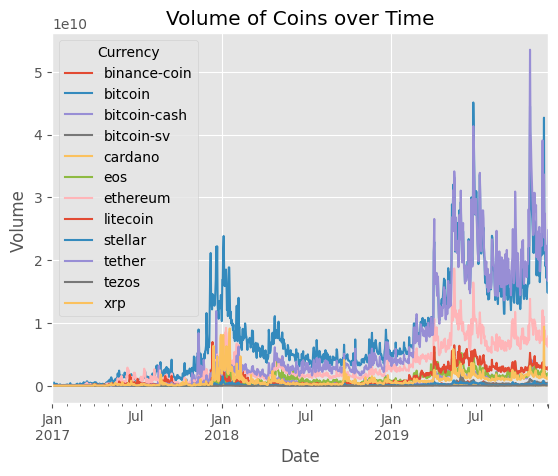

In [96]:
# Q5: Are there any notable patterns or trends in trading volumes over time?
#     Which cryptocurrencies experienced the highest trading volumes?


df = df[df['Date'].dt.year >= 2017]

df_volume = df.pivot_table(index='Date', columns='Currency', values='Volume')

plt.figure(figsize=(20, 20))
df_volume.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Volume ')
plt.title('Volume of Coins over Time')

# Biggest tranding volumes are peaked at 2019 of bitcoin-cash.